In [2]:
using DelimitedFiles, FileIO
using GLMakie
using JLD2
using NCDatasets

In [2]:
m = readdlm("Varna_topo_channels.txt")

42×149 Matrix{Float64}:
  0.0      0.0      0.0      0.0     …    0.0       0.0       0.0       0.0
  0.0      0.0      0.0      0.0          0.0       0.0       0.0       0.0
  0.0      0.0      0.0      0.0          0.0       0.0       0.0       0.0
  0.0      0.0      0.0      0.0          0.0       0.0       0.0       0.0
  0.0      0.0      0.0      0.0          0.0       0.0       0.0       0.0
  0.0      0.0      0.0      0.0     …    0.0       0.0       0.0       0.0
  0.0      0.0      0.0      0.0          0.0      -2.6667   -4.0       0.0
  0.0      0.0      0.0      0.0         -5.3333   -6.6667   -8.0     -12.0
  0.0      0.0      0.0      0.0         -9.3333  -10.8889  -12.4444  -12.0
  0.0      0.0      0.0      0.0        -12.4444  -12.8889  -13.1111  -14.0
  0.0      0.0      0.0      0.0     …  -13.1111  -13.5556  -13.7778  -14.0
  0.0      0.0      0.0      0.0        -13.7778  -14.0     -14.0     -14.0
  0.0      0.0      0.0      0.0        -14.2222  -14.4444  -14.

In [4]:
m[findall(m.<=-1000)] .= 0

1785-element view(::Matrix{Float64}, CartesianIndex{2}[CartesianIndex(1, 1), CartesianIndex(2, 1), CartesianIndex(3, 1), CartesianIndex(4, 1), CartesianIndex(5, 1), CartesianIndex(6, 1), CartesianIndex(7, 1), CartesianIndex(8, 1), CartesianIndex(9, 1), CartesianIndex(10, 1)  …  CartesianIndex(45, 43), CartesianIndex(46, 43), CartesianIndex(47, 43), CartesianIndex(48, 43), CartesianIndex(49, 43), CartesianIndex(50, 43), CartesianIndex(51, 43), CartesianIndex(52, 43), CartesianIndex(53, 43), CartesianIndex(54, 43)]) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

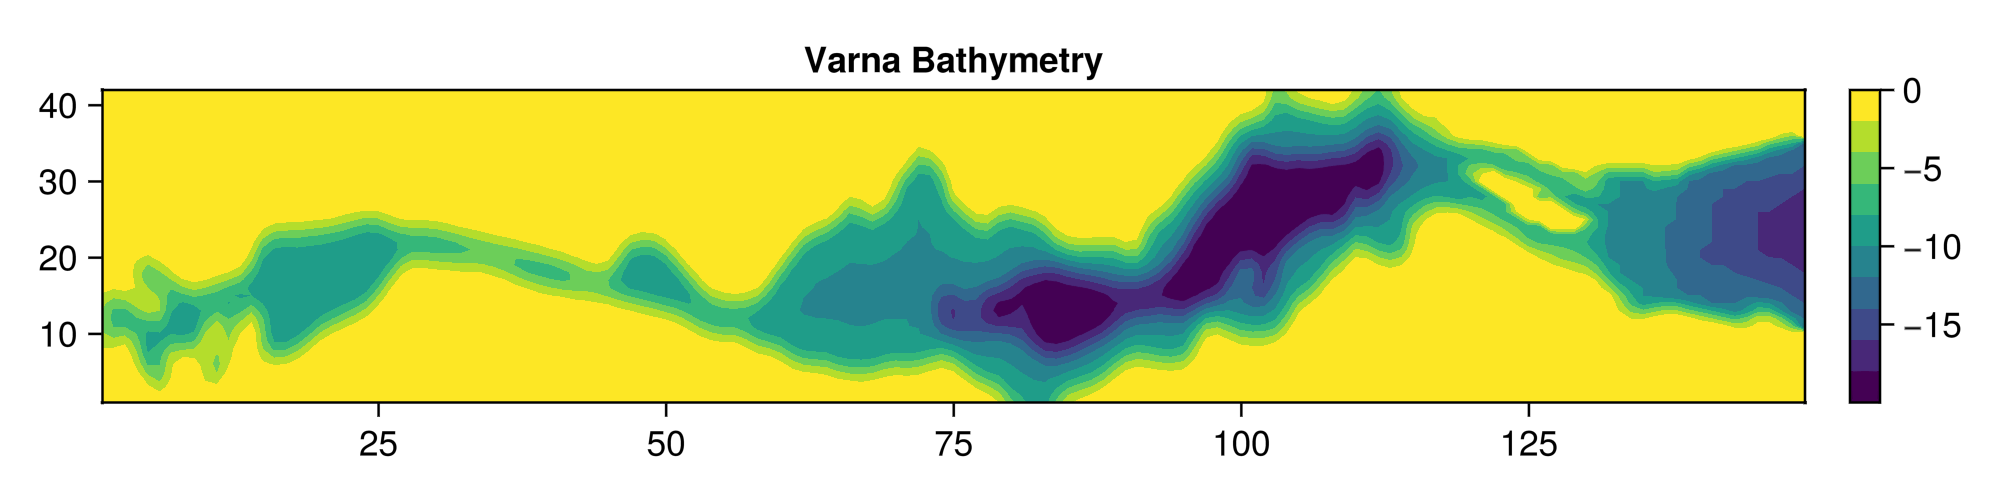

In [6]:
fig = Figure(size = (800, 200))
# Add a contour plot to the figure
ax = Axis(fig[1, 1], title = "Bathymetry")
# cf = contourf!(ax, rotr90(m, 1)[:, end:-1:1])
cf = contourf!(ax, rotr90(m, 1))
                # levels = range(-200, 0, length = 20),
                # extendhigh = :magenta)


Colorbar(fig[1, 2], cf)

# Customize the plot
ax.title = "Varna Bathymetry"

# Display the figure
fig

In [8]:
# @save "Varna_topo.jld2" "depth" = rotr90(m, 1)[:, end:-1:1]
@save "Varna_topo_channels.jld2" "depth" = rotr90(m, 1)

In [45]:
?@save

```
@save filename var1 [var2 ...]
@save filename {compress=true} var1 name2=var2
```

Write one or more variables `var1,...` from the current scope to a JLD2 file `filename`.

For interactive use you can save all variables in the current module's global scope using `@save filename`. More permanent code should prefer the explicit form to avoid saving unwanted variables.

# Example

To save the string `hello` and array `xs` to the JLD2 file example.jld2:

```
hello = "world"
xs = [1,2,3]
@save "example.jld2" hello xs
```

For passing options to the saving command use {}

```
@save "example.jld2" {compress=true} hello xs
```

For saving variables under a different name use regular assignment syntax

```
@save "example.jld2" greeting=hello xarray = xs
```
